In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import eig
from sklearn.metrics import silhouette_score
import random as rd
%matplotlib inline

In [6]:
country_data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
country_data['exports'] = country_data['exports']*country_data['gdpp']/100
country_data['health'] = country_data['health']*country_data['gdpp']/100
country_data['imports'] =country_data['imports']*country_data['gdpp']/100

In [9]:
country_data['exports'].apply(lambda x:round(x,2))
country_data['health'].apply(lambda x:round(x,2))
country_data['imports'].apply(lambda x:round(x,2))

0       248.30
1      1987.74
2      1400.44
3      1514.37
4      7185.80
        ...   
162    1565.19
163    2376.00
164    1050.62
165     450.64
166     451.14
Name: imports, Length: 167, dtype: float64

In [12]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [14]:
country_data.shape

(167, 10)

In [15]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [16]:
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [17]:
country_data.describe(include='object')

,country
count,167
unique,167
top,Afghanistan
freq,1


C:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for

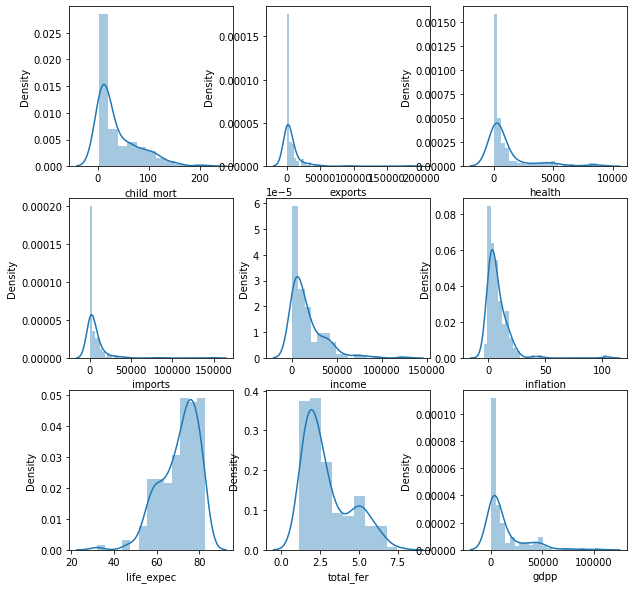

In [18]:
plt.figure(figsize=(10,10))
feature = country_data.columns[1:10]
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(country_data[i[1]])

Text(0.5, 1.0, 'Highest child Mortality counries')

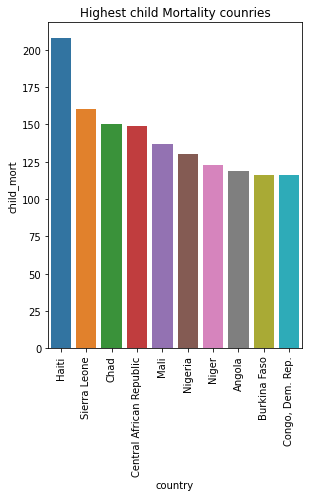

In [19]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
top10_child_mort = country_data[['country','child_mort']].sort_values('child_mort',ascending=False).head(10)
sns.barplot(x='country',y='child_mort',data=top10_child_mort)
plt.xticks(rotation=90)
plt.title('Highest child Mortality counries')

Text(0.5, 1.0, 'High GDPP Country')

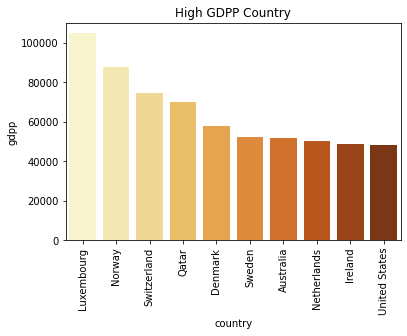

In [20]:
Top10_gdpp = country_data[['country','gdpp']].sort_values('gdpp', ascending=False).head(10)
sns.barplot(x='country',y='gdpp',data=Top10_gdpp,palette='YlOrBr')
plt.xticks(rotation=90)
plt.title('High GDPP Country')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Switzerland'),
  Text(2, 0, 'Norway'),
  Text(3, 0, 'Luxembourg'),
  Text(4, 0, 'Denmark'),
  Text(5, 0, 'Netherlands'),
  Text(6, 0, 'Canada'),
  Text(7, 0, 'Austria'),
  Text(8, 0, 'Sweden'),
  Text(9, 0, 'Germany')])

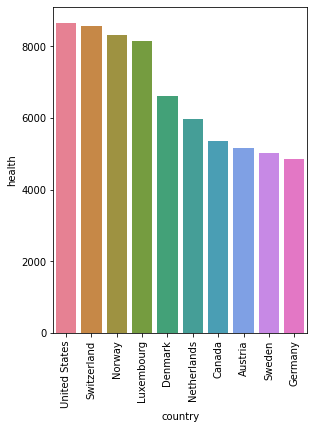

In [21]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)

Top10_health = country_data[['country','health']].sort_values('health', ascending=False).head(10)
sns.barplot(x='country',y='health',data=Top10_health,palette='husl')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'High Income Country')

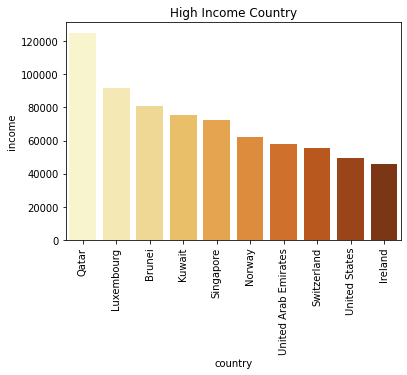

In [22]:
Top10_income = country_data[['country','income']].sort_values('income', ascending=False).head(10)
sns.barplot(x='country',y='income',data=Top10_income,palette='YlOrBr')
plt.xticks(rotation=90)
plt.title('High Income Country')

Text(0.5, 1.0, 'High Import Country')

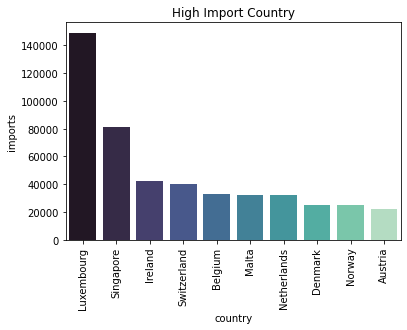

In [23]:
Top10_import = country_data[['country','imports']].sort_values('imports', ascending=False).head(10)
sns.barplot(x='country',y='imports',data=Top10_import,palette='mako')
plt.xticks(rotation=90)
plt.title('High Import Country')

Text(0.5, 1.0, 'Low Income Country')

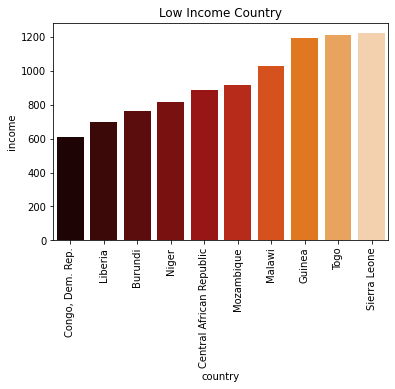

In [24]:
Bottom10_income = country_data[['country','income']].sort_values('income', ascending=True).head(10)
sns.barplot(x='country',y='income',data=Bottom10_income,palette='gist_heat')
plt.xticks(rotation=90)
plt.title('Low Income Country')


Text(0.5, 1.0, 'Lowest child Mortality counries')

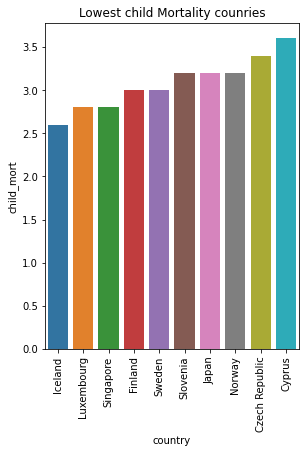

In [25]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,2)
bottom10_child_mort = country_data[['country','child_mort']].sort_values('child_mort',ascending=True).head(10)
sns.barplot(x='country',y='child_mort',data=bottom10_child_mort)
plt.xticks(rotation=90)
plt.title('Lowest child Mortality counries')

<AxesSubplot:>

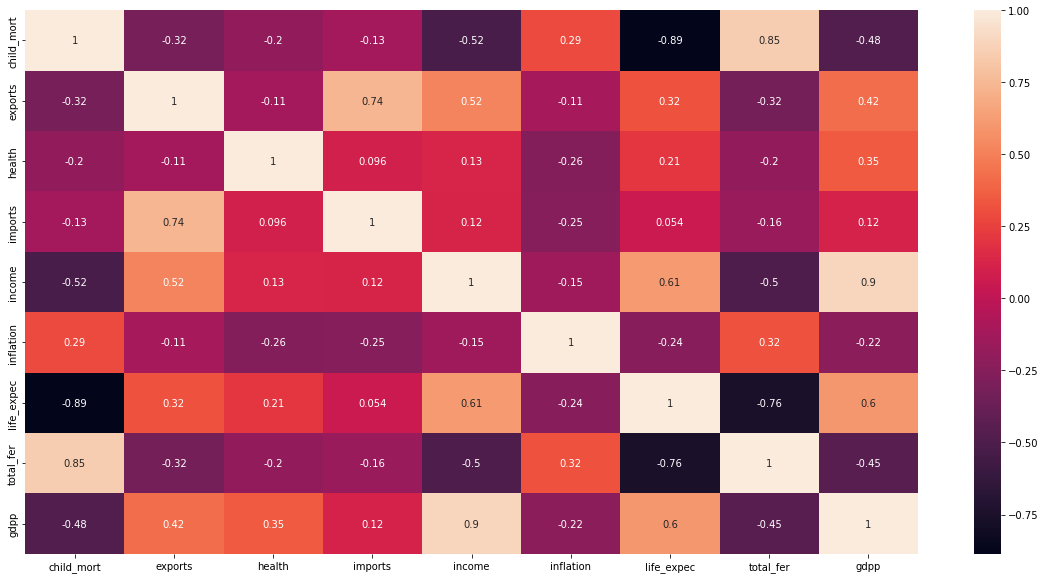

In [26]:
plt.figure(figsize=[20,10])
sns.heatmap(data.corr(),annot=True)

In [38]:
country_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [30]:
X1 =data.drop(['country'],axis=1)
Y1 = country_data['country']
X1.shape

(167, 9)

In [35]:
mean = np.mean(X1, axis =0)
std = np.std(X1, axis=0)
center = (X1 - mean)/std
center

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [36]:
Y1.shape

(167,)

C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python\Python310\lib\site-packages\seaborn\

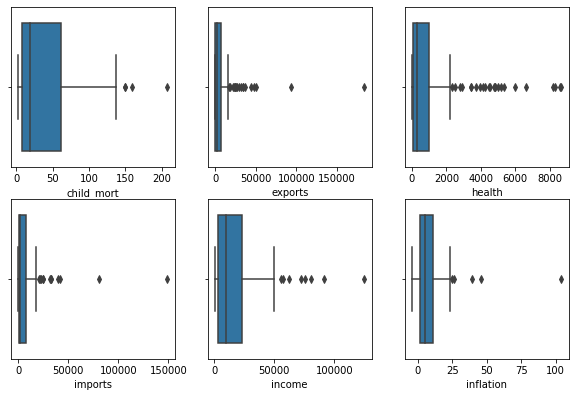

In [37]:
plt.figure(figsize=(10,10))

features = country_data.columns[1:7]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country_data[i[1]])

In [39]:
new_c= np.dot(center.T, center)/center.shape[0]
new_c.shape

(9, 9)

In [41]:
eigw,eigv=eig(new_c)
print('Eigen value here', eigw)
print('Eigen vector here', eigv)

Eigen value here [4.13565658 1.54634631 1.1703833  0.99478456 0.66061903 0.22358112
 0.06687501 0.08831536 0.11343874]
Eigen vector here [[ 0.41951945 -0.19288394  0.02954353 -0.37065326 -0.16896968 -0.20062815
  -0.3275418  -0.68274306 -0.07948854]
 [-0.28389698 -0.61316349 -0.14476069 -0.00309102  0.05761584  0.05933283
   0.12308207 -0.01419742 -0.70730269]
 [-0.15083782  0.24308678  0.59663237 -0.4618975   0.51800037 -0.00727646
  -0.11308797  0.07249683 -0.24983051]
 [-0.16148244 -0.67182064  0.29992674  0.07190746  0.25537642  0.03003154
  -0.09903717 -0.02894642  0.59218953]
 [-0.39844111 -0.02253553 -0.3015475  -0.39215904 -0.2471496  -0.16034699
  -0.61298247  0.35262369  0.09556237]
 [ 0.19317293  0.00840447 -0.64251951 -0.15044176  0.7148691  -0.06628537
   0.02523614 -0.01153775  0.10463252]
 [-0.42583938  0.22270674 -0.11391854  0.20379723  0.1082198   0.60112652
  -0.29403981 -0.50466425  0.01848639]
 [ 0.40372896 -0.15523311 -0.01954925 -0.37830365 -0.13526221  0.7506887

In [45]:
def z_score(values):
    mean1 = np.mean(values)
    std1 = np.std(values)
    z_scores = [(x - mean1) / std1 for x in values]
    return z_scores
z_custom = np.array([z_score(data['child_mort'])])
np.abs(z_custom)


array([[1.29153238, 0.5389489 , 0.27283273, 2.00780766, 0.69563412,
        0.5911773 , 0.50164289, 0.8324228 , 0.84485813, 0.02312823,
        0.60858677, 0.73791425, 0.27680906, 0.5986385 , 0.81501333,
        0.839884  , 0.48423342, 1.8088423 , 0.11017558, 0.20717119,
        0.78019439, 0.35390814, 0.45936275, 0.69065998, 0.68319878,
        1.93319565, 1.37609265, 0.15245571, 1.73423029, 0.81252626,
        0.29272927, 2.75392774, 2.77879841, 0.73542719, 0.5613325 ,
        0.48920756, 1.24179104, 1.93319565, 0.63743377, 0.69812118,
        1.8088423 , 0.81501333, 0.8622676 , 0.86724173, 0.84983227,
        0.09625098, 0.32754821, 0.22806553, 0.47428516, 1.8088423 ,
        0.42105895, 0.839884  , 0.35241888, 0.87719   , 0.8473452 ,
        0.63245964, 1.04531275, 0.54143596, 0.8473452 , 0.906037  ,
        0.8548064 , 0.58869024, 0.07138031, 1.75910096, 1.88345431,
        0.01666484, 4.22129724, 0.80257799, 0.88713827, 0.51059336,
        0.12360872, 0.47179809, 0.03407431, 0.84

In [47]:
from scipy import stats
z_score = np.abs(stats.zscore(data[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]))
z_score

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,1.138280,0.279088,0.082455,0.808245,0.157336,1.619092,1.902882,0.679180
1,0.538949,0.479658,0.097016,0.070837,0.375369,0.312347,0.647866,0.859973,0.485623
2,0.272833,0.099122,0.966073,0.641762,0.220844,0.789274,0.670423,0.038404,0.465376
3,2.007808,0.775381,1.448071,0.165315,0.585043,1.387054,1.179234,2.128151,0.516268
4,0.695634,0.160668,0.286894,0.497568,0.101732,0.601749,0.704258,0.541946,0.041817
...,...,...,...,...,...,...,...,...,...
162,0.225578,0.200917,0.571711,0.240700,0.738527,0.489784,0.852161,0.365754,0.546913
163,0.526514,0.461363,0.695862,1.213499,0.033542,3.616865,0.546361,0.316678,0.029323
164,0.372315,1.130305,0.008877,1.380030,0.658404,0.409732,0.286958,0.661206,0.637754
165,0.448417,0.406478,0.597272,0.517472,0.658924,1.500916,0.344633,1.140944,0.637754


In [48]:
data_final = data[(z_score < 3).all(axis=1)]
data_final    

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [50]:
sort_index=np.argsort(eigw)[::-1]
print(sort_index)

[0 1 2 3 4 5 8 7 6]


In [51]:
eigw = eigw[sort_index]
v = eigv[:, sort_index]

In [52]:
total = sum(eigw)
variance = [(i / total)*100 for i in eigw]
variance


[45.95173978609586,
 17.18162565161822,
 13.004258896953086,
 11.053161805571929,
 7.3402114241560374,
 2.4842346764277417,
 1.2604303981650264,
 0.9812817379261416,
 0.7430556230859501]

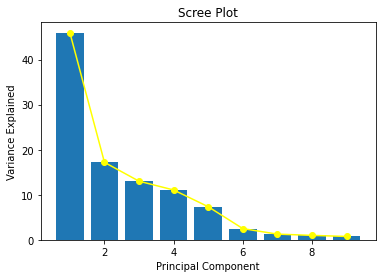

In [57]:
PC_values = np.arange(eigw.shape[0]) + 1
plt.plot(PC_values, variance, 'o-', color='yellow')
plt.bar(PC_values, variance)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [60]:
np.cumsum(variance)

array([ 45.95173979,  63.13336544,  76.13762433,  87.19078614,
        94.53099756,  97.01523224,  98.27566264,  99.25694438,
       100.        ])

In [61]:
data_final.shape

(153, 10)

In [124]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)
x_pca_final = pca_final.fit_transform(x_data)
x_pca_final.shape

(153, 4)

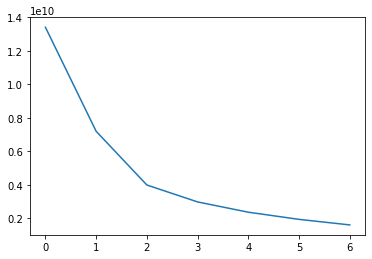

In [125]:
from sklearn.cluster import KMeans
arr = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(num_clusters)
    kmeans.fit(x_data.to_numpy())
    
    arr.append(kmeans.inertia_)

plt.plot(arr)

In [126]:
class KMeansCustom:
    def __init__(self, n_clusters=5): #Setting default value to 5 clusters
        self.n_clusters = n_clusters 

    def fit(self, X): 
        n_inits = 5 # number of times to run kmeans
        jobs = [] # list of final cluster centers ie output

        for init in range(n_inits):            
            cluster_centers = X[np.random.randint(0, len(X), self.n_clusters)] #Assigning random cluster centers between 0 and length of X. No of random points = cluster centers
            
            for step in range(10):
                vote = [] # list of cluster assignments
                distance = 0 # sum of distances from each point to its cluster center

                for point in X:
                    #Calculating euclidean distances
                    euc_distances = np.sum((cluster_centers - point) ** 2, axis=1) ** .5 # Euclidean distance
                    vote.append(euc_distances.argmin()) # assign point to closest cluster
                    distance += euc_distances[euc_distances.argmin()]  # add distance to closest cluster
                npvote = np.array(vote) 

                for i in range(self.n_clusters): # update cluster centers
                    cluster_centers[i] = (X[npvote == i]).mean(axis=0)   # Assigning centroid to the minimum distance point          
            jobs.append([distance, cluster_centers, npvote]) # append final cluster centers and distance
        
        idx = np.array([job[0] for job in jobs]).argmin() #Index where the distance is the minimum        
        distance, cluster_centers, npvote = jobs[idx] # Assigning the final minimum distances and cluster centers       
        self.labels_ = npvote
        self.cluster_centers_ = cluster_centers

<AxesSubplot:ylabel='gdpp'>

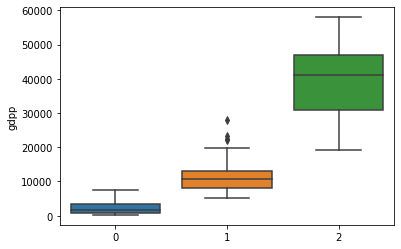

In [128]:
sns.boxplot(x=model.labels_, y='gdpp', data=x_data)

<AxesSubplot:xlabel='Cluster', ylabel='gdpp'>

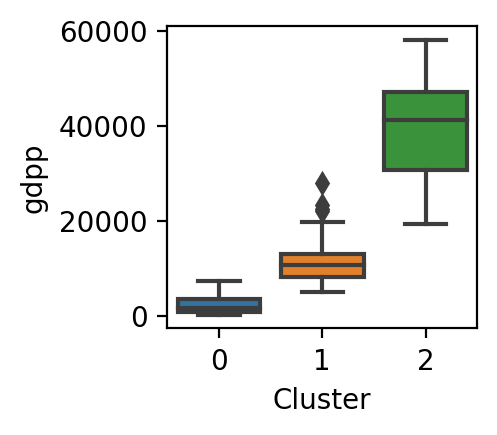

In [129]:
plt.figure(figsize=(2,2),dpi=200)
sns.boxplot(x='Cluster', y='gdpp', data=data_final)

<AxesSubplot:xlabel='income', ylabel='health'>

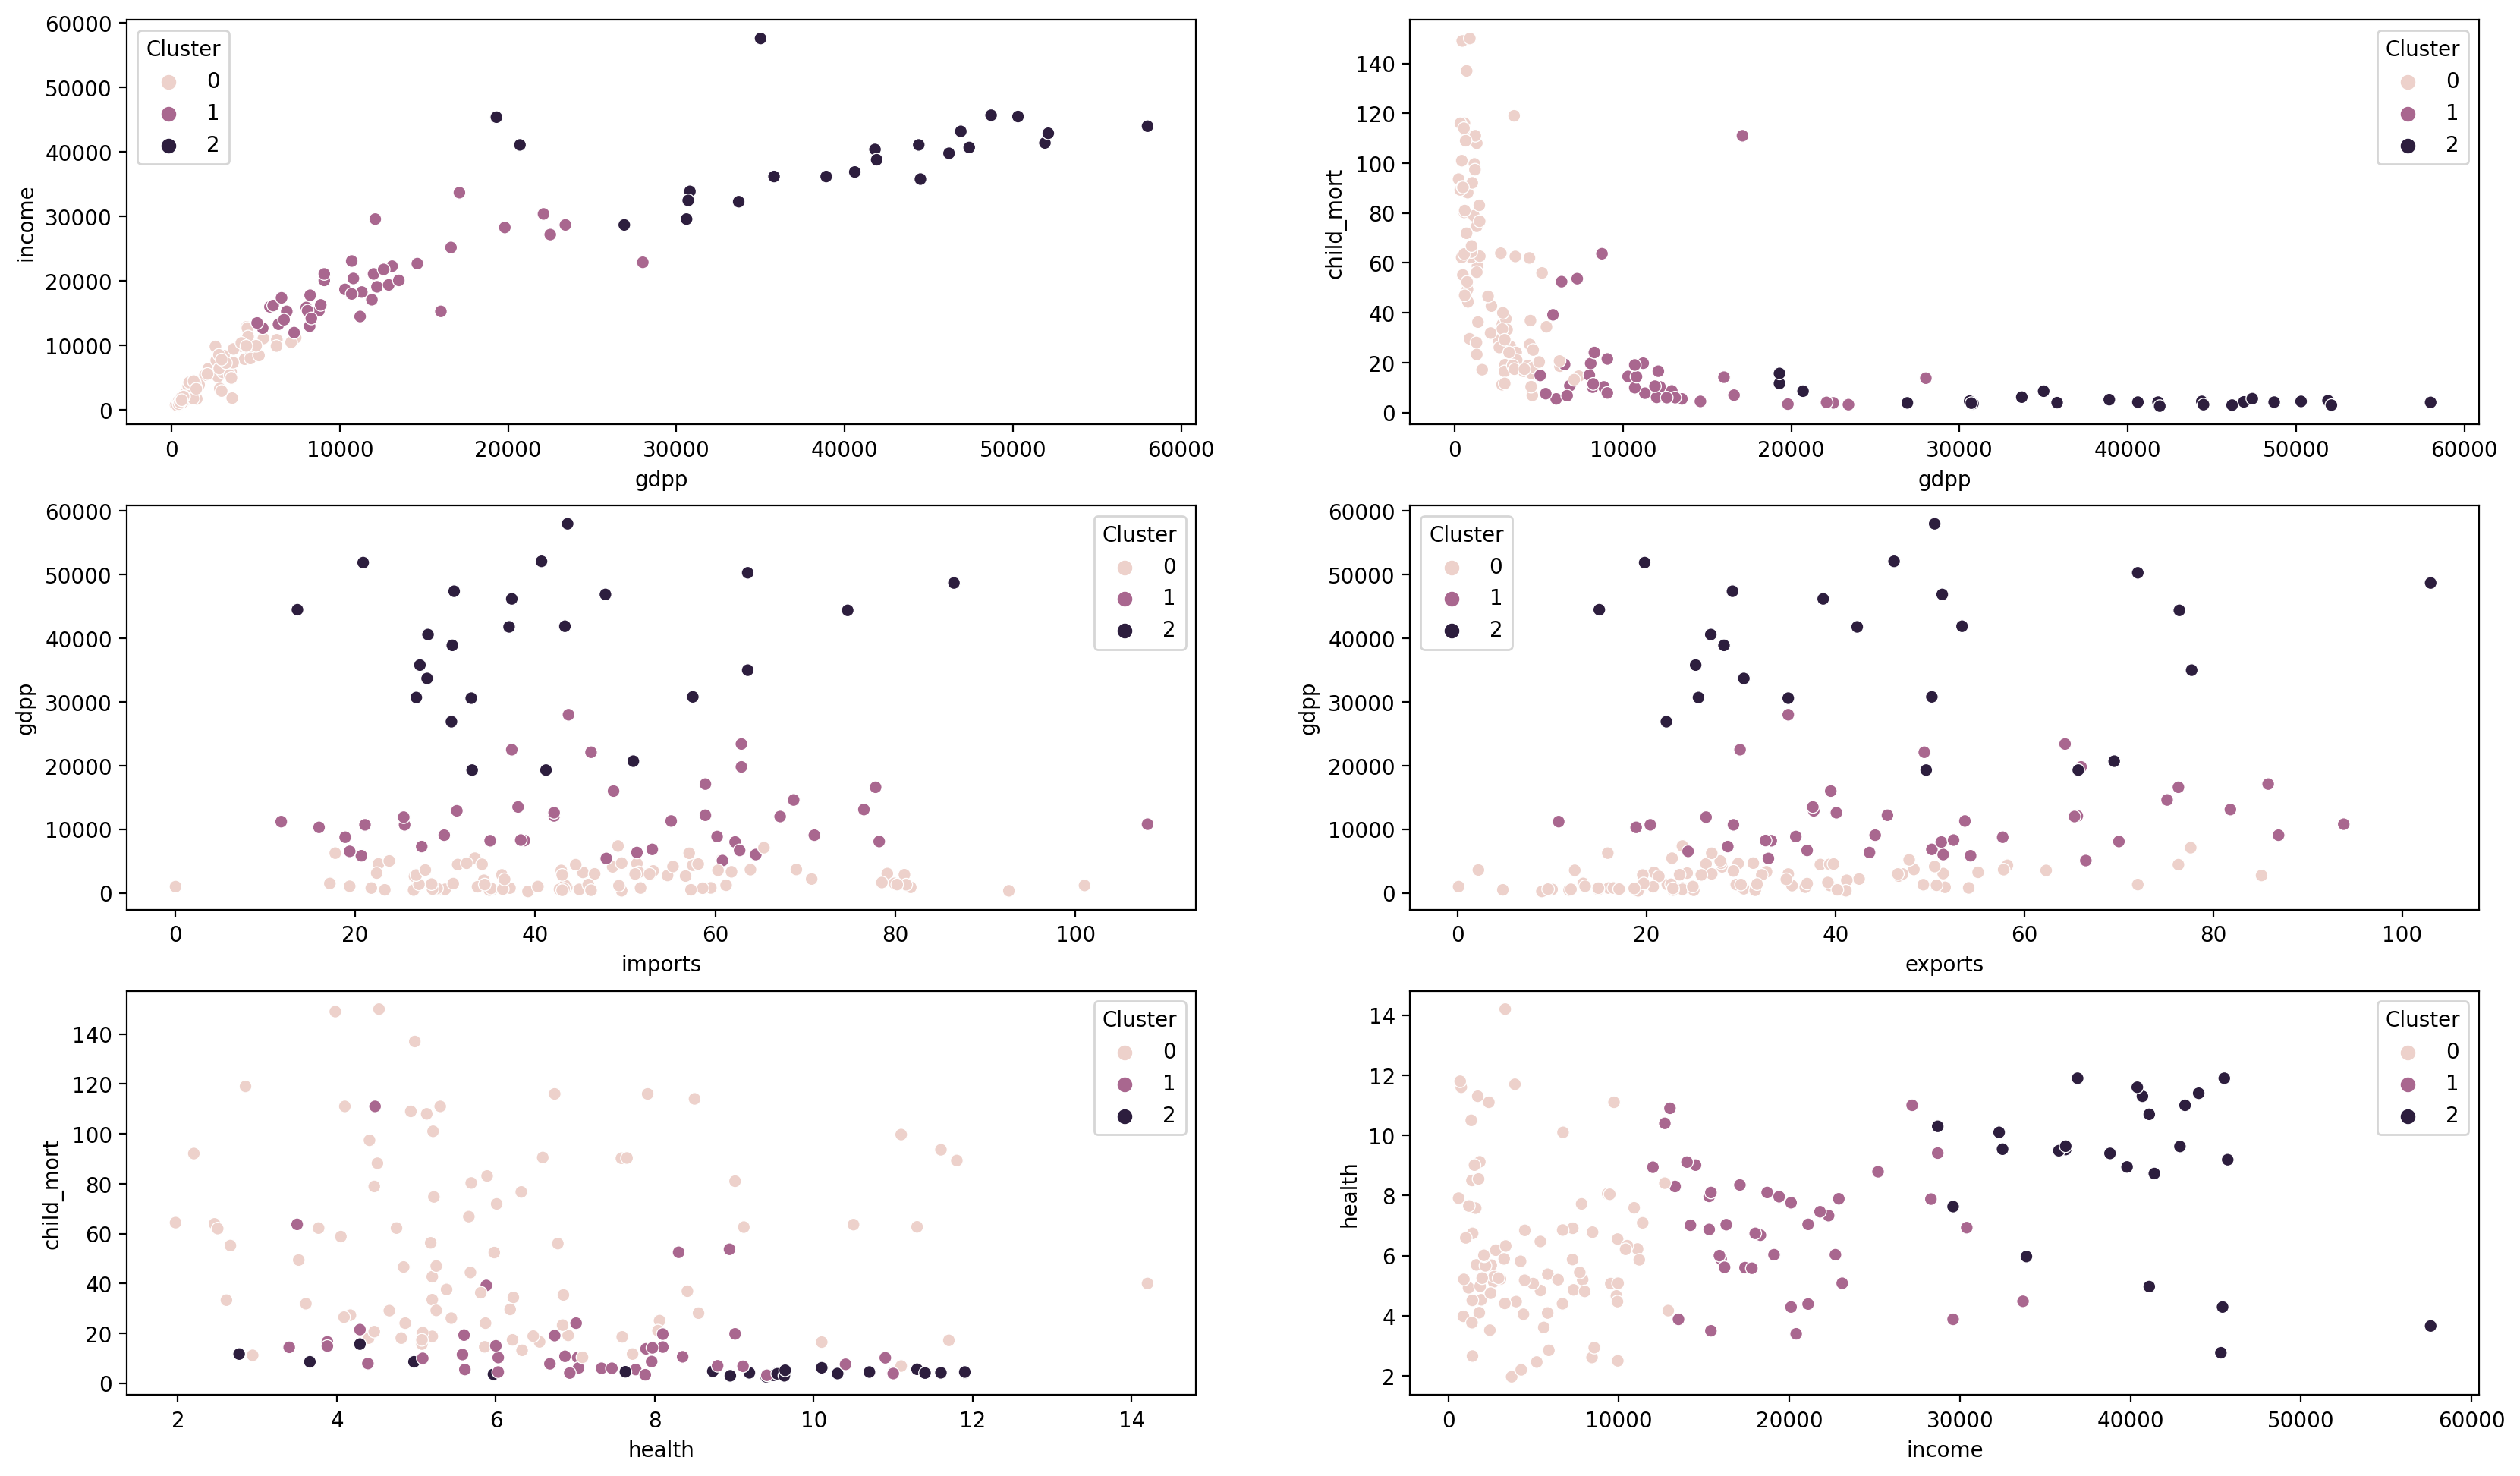

In [130]:
plt.figure(figsize=(20,12),dpi=200)

plt.subplot(3,2,1)
sns.scatterplot(x='gdpp', y='income', data = data_final, hue='Cluster')

plt.subplot(3,2,2)
sns.scatterplot(x='gdpp', y='child_mort', data = data_final, hue='Cluster')


plt.subplot(3,2,3)
sns.scatterplot(x='imports', y='gdpp', data = data_final, hue='Cluster')


plt.subplot(3,2,4)
sns.scatterplot(x='exports', y='gdpp', data = data_final, hue='Cluster')

plt.subplot(3,2,5)
sns.scatterplot(x='health', y='child_mort', data = data_final, hue='Cluster')

plt.subplot(3,2,6)
sns.scatterplot(x='income', y='health', data = data_final, hue='Cluster')

In [131]:
p = 4
features = v[:,0:p]
pc = np.dot(center, features)
X = pc
m = X.shape[0]  #167
n = X.shape[1]  #3
rownames = list(data['country'])
pcs_df = pd.DataFrame({'country':rownames,'PC1':pc[:, 0],'PC2':pc[:, 1],'PC3':pc[:, 2],'PC4':pc[:, 3]})
pcs_df.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,2.913025,-0.095621,0.718118,-1.005255
1,Albania,-0.429911,0.588156,0.333486,1.161059
2,Algeria,0.285225,0.455174,-1.221505,0.868115
3,Angola,2.932423,-1.695555,-1.525044,-0.839625
4,Antigua and Barbuda,-1.033576,-0.136659,0.225721,0.847063


<AxesSubplot:xlabel='PC3', ylabel='PC1'>

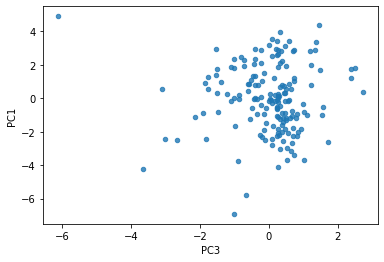

In [132]:
pcs_df.plot.scatter(x="PC3", y="PC1", alpha=0.8)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

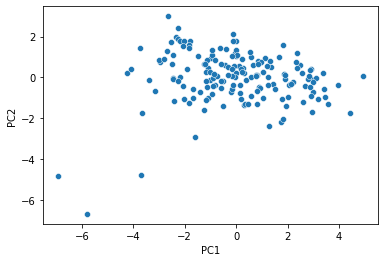

In [133]:
sns.scatterplot(x='PC1',y='PC2',data=pcs_df)

<AxesSubplot:xlabel='PC3', ylabel='PC2'>

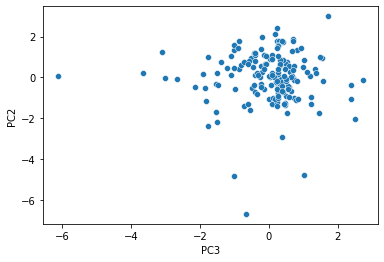

In [134]:
sns.scatterplot(x='PC3',y='PC2',data=pcs_df)

<AxesSubplot:xlabel='PC1', ylabel='PC4'>

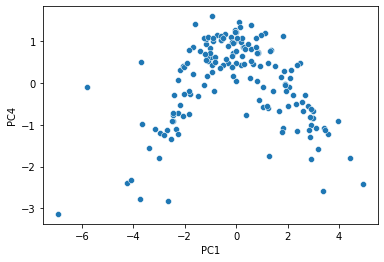

In [135]:
sns.scatterplot(x='PC1',y='PC4',data=pcs_df)

In [139]:
def k_means(K):

    Centroids=np.array([]).reshape(n,0)
    for i in range(K):
        rand=rd.randrange(0,m-1)
        Centroids=np.c_[Centroids,X[rand]]
    output={}
    for i in range(500):
        euclid=np.array([]).reshape(m,0)
        for k in range(K):
            dist=np.sum((pc-Centroids[:,k])**2,axis=1)
            euclid=np.c_[euclid,dist]
        C=np.argmin(euclid,axis=1)+1
        
        cent={}
        for k in range(K):
            cent[k+1]=np.array([]).reshape(n,0)
        for k in range(m):
            cent[C[k]]=np.c_[cent[C[k]],pc[k]]
        for k in range(K):
            cent[k+1]=cent[k+1].T
        for k in range(K):
            Centroids[:,k]=np.mean(cent[k+1],axis=0)
        final=cent
        
    labels=[]
    for i in pc:
        for j in final.keys():
            if i in final[j]:
                labels.append(j)
                break

    labels = np.array(labels)
    return labels

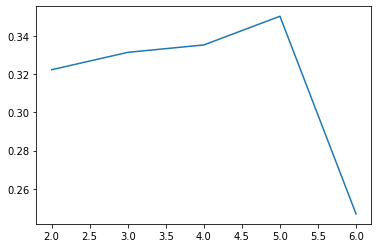

In [140]:
plot_scores = []
for i in range(2,7):
    plot_scores.append(silhouette_score(pc, k_means(i)))
plt.plot(range(2, 7), plot_scores)
plt.show()

In [141]:
K = 3
clustered_df = pd.concat([pcs_df, pd.Series(k_means(K))], axis=1)
clustered_df.columns = ['country', 'PC1', 'PC2','PC3','PC4','ClusterID']
clustered_df.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,2.913025,-0.095621,0.718118,-1.005255,3
1,Albania,-0.429911,0.588156,0.333486,1.161059,2
2,Algeria,0.285225,0.455174,-1.221505,0.868115,2
3,Angola,2.932423,-1.695555,-1.525044,-0.839625,3
4,Antigua and Barbuda,-1.033576,-0.136659,0.225721,0.847063,2


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

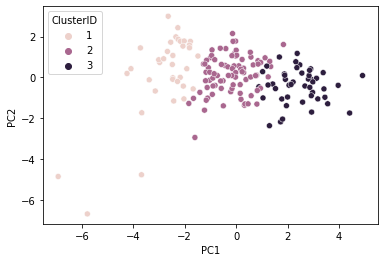

In [143]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=clustered_df)

<AxesSubplot:xlabel='PC3', ylabel='PC1'>

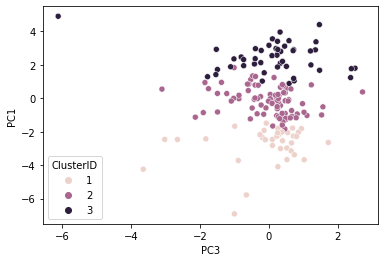

In [144]:
sns.scatterplot(x='PC3',y='PC1',hue='ClusterID',legend='full',data=clustered_df)

<AxesSubplot:xlabel='PC3', ylabel='PC2'>

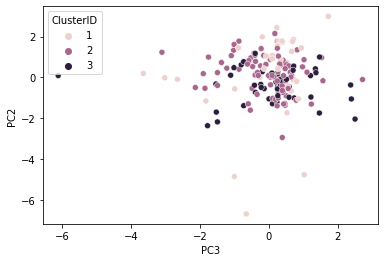

In [145]:
sns.scatterplot(x='PC3',y='PC2',hue='ClusterID',legend='full',data=clustered_df)

<AxesSubplot:xlabel='PC1', ylabel='PC4'>

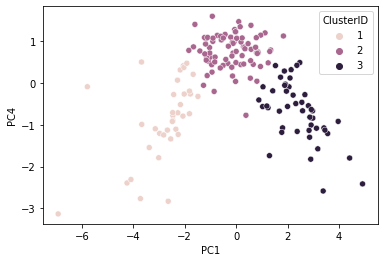

In [146]:
sns.scatterplot(x='PC1',y='PC4',hue='ClusterID',legend='full',data=clustered_df)

In [147]:
feature_df=pd.merge(data,clustered_df,on='country')
feature_df


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2.913025,-0.095621,0.718118,-1.005255,3
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-0.429911,0.588156,0.333486,1.161059,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0.285225,0.455174,-1.221505,0.868115,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2.932423,-1.695555,-1.525044,-0.839625,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,-1.033576,-0.136659,0.225721,0.847063,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0.820631,-0.639570,0.389923,0.706595,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0.551036,1.233886,-3.101350,0.115311,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,-0.498524,-1.390744,0.238526,1.074098,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1.887451,0.109453,-1.109752,-0.056257,3


<AxesSubplot:xlabel='child_mort', ylabel='income'>

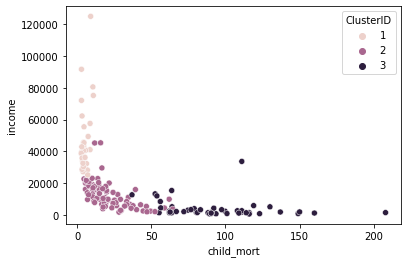

In [149]:
feature_df1=feature_df[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','ClusterID']]
clu_chi = pd.DataFrame(feature_df1.groupby(["ClusterID"]).child_mort.mean())
clu_exp = pd.DataFrame(feature_df1.groupby(["ClusterID"]).exports.mean())
clu_imp = pd.DataFrame(feature_df1.groupby(["ClusterID"]).imports.mean())
clu_hea = pd.DataFrame(feature_df1.groupby(["ClusterID"]).health.mean())
clu_inc = pd.DataFrame(feature_df1.groupby(["ClusterID"]).income.mean())
clu_inf = pd.DataFrame(feature_df1.groupby(["ClusterID"]).inflation.mean())         
clu_lif = pd.DataFrame(feature_df1.groupby(["ClusterID"]).life_expec.mean())
clu_tot = pd.DataFrame(feature_df1.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp = pd.DataFrame(feature_df1.groupby(["ClusterID"]).gdpp.mean())


sns.scatterplot(x='child_mort',y='income',hue='ClusterID',data=feature_df1)

<AxesSubplot:xlabel='income', ylabel='gdpp'>

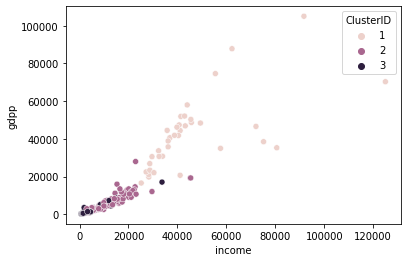

In [150]:
sns.scatterplot(x='income',y='gdpp', hue='ClusterID', data=feature_df1)

In [151]:
feature_df1[feature_df1['ClusterID']==3]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.00,44.9,7.58,1610,9.440,56.2,5.82,553,3
3,Angola,119.0,62.30,42.9,2.85,5900,22.400,60.1,6.16,3530,3
17,Benin,111.0,23.80,37.2,4.10,1820,0.885,61.8,5.36,758,3
21,Botswana,52.5,43.60,51.3,8.30,13300,8.920,57.1,2.88,6350,3
25,Burkina Faso,116.0,19.20,29.6,6.74,1430,6.810,57.9,5.87,575,3
26,Burundi,93.6,8.92,39.2,11.60,764,12.300,57.7,6.26,231,3
28,Cameroon,108.0,22.20,27.0,5.13,2660,1.910,57.3,5.11,1310,3
31,Central African Republic,149.0,11.80,26.5,3.98,888,2.010,47.5,5.21,446,3
32,Chad,150.0,36.80,43.5,4.53,1930,6.390,56.5,6.59,897,3
36,Comoros,88.2,16.50,51.7,4.51,1410,3.870,65.9,4.75,769,3


In [152]:
feature_df1[feature_df1['ClusterID']==1]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,19.8,20.9,8.73,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,47.8,11.00,43200,0.873,80.5,1.44,46900,1
11,Bahrain,8.6,69.5,50.9,4.97,41100,7.440,76.0,2.16,20700,1
15,Belgium,4.5,76.4,74.7,10.70,41100,1.880,80.0,1.86,44400,1
23,Brunei,10.5,67.4,28.0,2.84,80600,16.700,77.1,1.84,35300,1
29,Canada,5.6,29.1,31.0,11.30,40700,2.870,81.3,1.63,47400,1
42,Cyprus,3.6,50.2,57.5,5.97,33900,2.010,79.9,1.42,30800,1
43,Czech Republic,3.4,66.0,62.9,7.88,28300,-1.430,77.5,1.51,19800,1
44,Denmark,4.1,50.5,43.6,11.40,44000,3.220,79.5,1.87,58000,1
53,Finland,3.0,38.7,37.4,8.95,39800,0.351,80.0,1.87,46200,1
